### Treść zadania

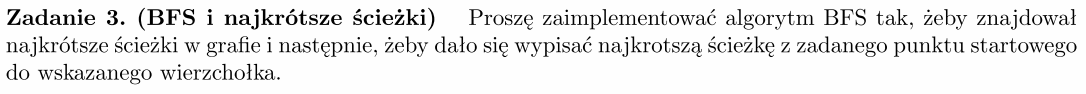

Polecenie trochę jest niejasne, ponieważ sugeruje ono, że algorytm ma znajdować najpierw najkrótsze ścieżki (między czym a czym? ile ścieżek? może najkrótsze dla każdej pary wierzchołków?), a dopiero po znalezieniu tych ścieżek ma dać się (tylko) wypisać (bez wyznaczania) najkrótszą ścieżkę z zadanego punktu startowego do wskazanego wierzchołka (innymi słowy, między wskazaną parą wierzchołków).

### Omówienie algorytmu
##### Wersja, w której wyznaczamy ścieżkę na bieżąco pomiędzy wskazaną parą wierzchołków

###### UWAGA: 
To, czy graf jest skierowany, czy nie, nie ma większego znaczenia w działaniu algorytmu. W obu przypadkach postępujemy tak samo.

### Implementacja #1
##### Z wyznaczaniem ścieżki na bieżąco

W przypadku tego algorytmu, odpalamy po prostu algorytm BFS. Z każdym krokiem zapamiętujemy, skąd przyszliśmy do danego wierzchołka, jeżeli nie był on jeszcze odwiedzony. Jeżeli jednak odwiedziliśmy jakiś wierzchołek wcześniej, oznacza to, że poprzednia ścieżka była krótsza, więc pomijamy go. Po dotarciu do celu mamy pewność, że dotarliśmy najkrótszą ścieżką (BFS tak działa, że idzie falami, więc sprawdza wszystkie ścieżki).

### Złożoność

Jak algorytmu BFS dla listowej reprezentacji grafu (używamy implementacji dla list)
###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $

In [36]:
from queue import Queue


def restore_path(parents, source, target):
    # If there is no parent of the target, a graph must be inconsistent
    # or there is no path between a source and a target
    if parents[target] < 0: return []
    path = []
    u = target
    while u != source:
        path.append(u)
        u = parents[u]
    path.append(source)
    
    # Reverse elements of a path to restore the original order
    for i in range(len(path) // 2):
        swap(path, i, len(path) - 1 - i)
    
    return path


def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def shortest_path(G: 'graph represented by adjacency lists', source, target):
    if source == target: return []
    n = len(G)
    parents = [-1] * n  # The array of parents will also be used to mark visited vertices
    q = Queue()
    q.put(source)
    
    while not q.empty():
        u = q.get()
        # Break if reached the target
        if u == target: break
        for v in G[u]:
            if parents[v] < 0:
                parents[v] = u
                q.put(v)
    
    # Restore the path
    return restore_path(parents, source, target)


def directed_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

###### Kilka testów

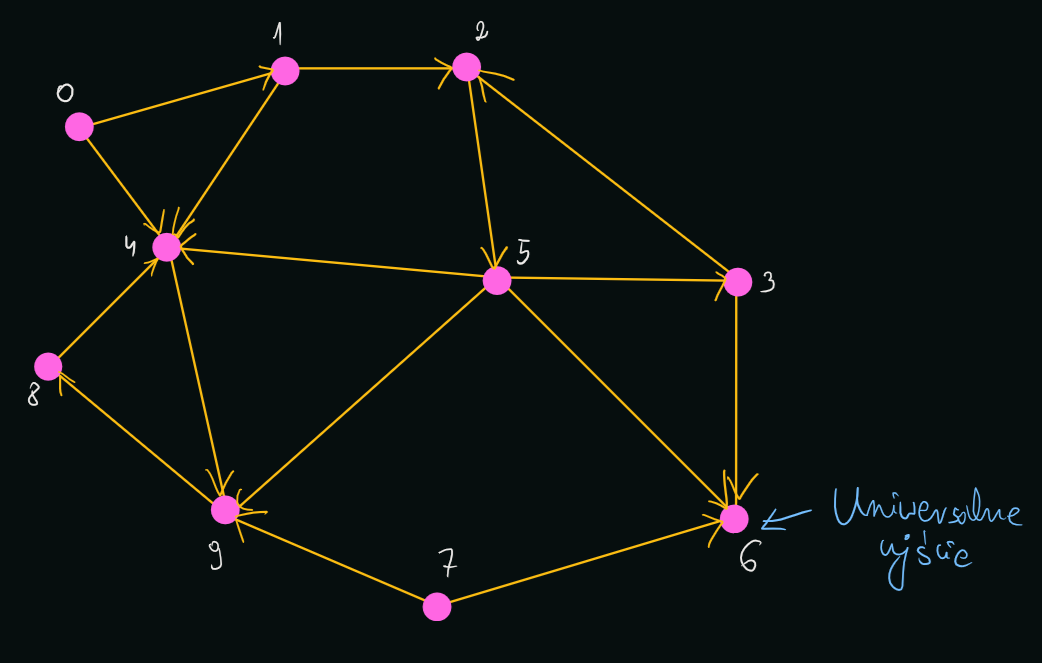

In [39]:
E = [(0, 1), (0, 4), (8, 4), (9, 8), (4, 9), (1, 4), (1, 2), (2, 5), (3, 2), (5, 4), (5, 3), (3, 6),
     (5, 9), (7, 9), (7, 6), (5, 6)]
G = directed_graph_list(E)

print(*G, sep='\n')

[1, 4]
[4, 2]
[5]
[2, 6]
[9]
[4, 3, 9, 6]
[]
[9, 6]
[4]
[8]


In [40]:
print(shortest_path(G, 0, 6))
print(shortest_path(G, 7, 6))
print(shortest_path(G, 7, 4))
print(shortest_path(G, 3, 9))

[0, 1, 2, 5, 6]
[7, 6]
[7, 9, 8, 4]
[3, 2, 5, 9]


### Implementacja #2
##### Z wyznaczaniem tablicy rodziców i generowaniem wskazanej ścieżki

Ten algorytm polega na tym, że przechodzimy przez cały graf, i zapisujemy rodziców każdego z wierzchołków (dla każdego punktu startowego robimy osobny przebieg i osobną tablicę rodziców). Aby uzyskać najkrótszą ścieżkę, będzie konieczne wybranie odpowiedniej tablicy rodziców dla danego punktu początkowego i przejście przez kolejnych rodziców, poczynając od rodzica elementu docelowego i kończąc na elemencie startowym).

### Złożoność

##### Generowanie tablic rodziców:
BFS dla każdego wierzchołka startowego.
###### Obliczeniowa:
$ O((V + E) \cdot V) $
###### Pamięciowa:
$ O(V^2) $
##### Rekonstrukcja najkrótszej ścieżki dla wskazanej pary wierzchołków:
Zależna od długości ścieżki. Maksymalnie ścieżka ma $ V $ wierzchołków po drodze, więc stąd poniższe złożoności.
###### Obliczeniowa:
$ O(V) $
###### Pamięciowa:
$ O(V) $

In [44]:
from queue import Queue


def gen_parents(G, u, parents):
    q = Queue()
    q.put(u)
    
    while not q.empty():
        u = q.get()
        for v in G[u]:
            # If is not visited
            if parents[v] < 0:
                parents[v] = u
                q.put(v)
                

def shortest_paths(G: 'graph represented by adjacency lists'):
    n = len(G)
    # The array of parents will also be used to mark visited vertices
    parents = [[-1] * n for _ in range(n)]
    # For each possible beginning vertex create parents array
    for u in range(n): 
        # Pass only a pointer to the parents array of u beginning vertex
        gen_parents(G, u, parents[u])
    
    # Create a closure which will be used to restore paths from parents array created above
    def restore_path(u: 'begin vertex', v: 'target vertex'):
        path = []
        parents_ = parents[u]
        
        while parents_[v] >= 0:
            path.append(v)
            v = parents_[v]
        
        if v != u: return None  # There is no path between vertices
        
        # Otherwise, append the beginning vertex and reverse an array to get the right order
        path.append(u)
        return path[::-1]
        
    # Return the function
    return restore_path
    

def directed_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

###### Kilka testów

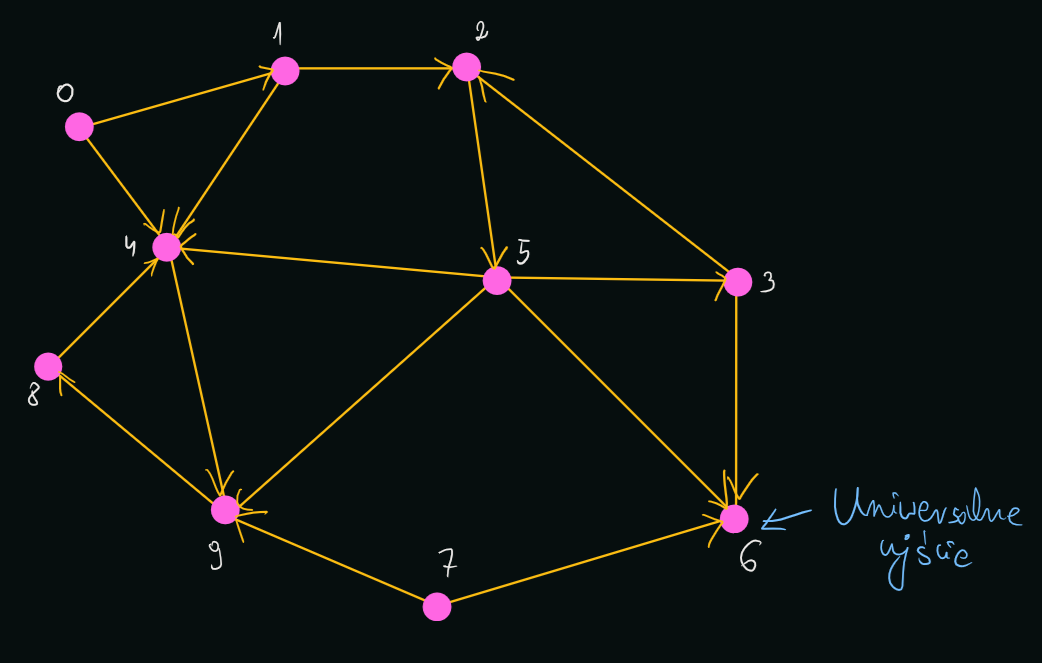

In [45]:
E = [(0, 1), (0, 4), (8, 4), (9, 8), (4, 9), (1, 4), (1, 2), (2, 5), (3, 2), (5, 4), (5, 3), (3, 6),
     (5, 9), (7, 9), (7, 6), (5, 6)]
G = directed_graph_list(E)

print(*G, sep='\n')

[1, 4]
[4, 2]
[5]
[2, 6]
[9]
[4, 3, 9, 6]
[]
[9, 6]
[4]
[8]


In [57]:
restore_path = shortest_paths(G)

def print_res(u, v):
    res = restore_path(u, v)
    print(f"Path from {u} to {v}:   {' -> '.join(map(str, res)) if res else 'no path exists'}")

In [58]:
print_res(0, 6)

Path from 0 to 6:   0 -> 1 -> 2 -> 5 -> 6


In [59]:
print_res(0, 7)

Path from 0 to 7:   no path exists


In [60]:
print_res(7, 4)

Path from 7 to 4:   7 -> 9 -> 8 -> 4


In [61]:
print_res(0, 9)

Path from 0 to 9:   0 -> 4 -> 9
